# 신경망
---

## 1. 신경망(Neural Network)이란?

> “사람의 뇌 뉴런처럼, 입력을 받아 가중치를 통해 출력을 계산하는 모델”

### 🔹 기본 구조


```
입력층(Input) → 은닉층(Hidden) → 출력층(Output)

```

|구성요소|설명|예시|
|---|---|---|
|**입력층**|데이터의 특징(feature)을 입력받음|공부시간, 온도, 나이 등|
|**가중치(weight)**|입력값의 중요도를 조절|w1, w2, w3 ...|
|**활성함수**|뉴런이 “활성화”될지 결정|sigmoid, relu 등|
|**출력층**|최종 예측값 계산|합격/불합격, 0/1 등|


### 🧩 뉴런(Neuron) 하나의 수식

> 뉴런의 계산은 “가중합 → 활성함수 적용”으로 표현됩니다.

$y = f(w_1x_1 + w_2x_2 + b)$

|기호|의미|
|---|---|
|(x_1, x_2)|입력값|
|(w_1, w_2)|가중치|
|(b)|편향(Bias)|
|(f)|활성함수|
|(y)|출력값|


## 2. 퍼셉트론(Perceptron)

> “가장 단순한 형태의 인공신경망(ANN)”

### 🔹 작동원리

1. 입력값에 가중치를 곱해 합산
2. 편향(bias)을 더함
3. 활성함수로 결과를 변환 (0 또는 1)

## 3. 활성함수(Activation Function)

> 뉴런이 얼마나 활성화될지를 결정하는 함수

| 이름          | 수식                            | 설명             | 모양     |
| ----------- | ----------------------------- | -------------- | ------ |
| **Step**    | 0 또는 1                        | 단순한 임계값 기반     | 🔲 계단형 |
| **Sigmoid** | ( f(x) = \frac{1}{1+e^{-x}} ) | 0~1 사이 연속적     | 🌊 S자형 |
| **ReLU**    | ( f(x) = \max(0, x) )         | 음수는 0, 양수는 그대로 | ⬆️ 선형  |
| **tanh**    | -1~1 범위                       | S자형, 중심이 0     | ↕️ 대칭형 |

> 💬 한 줄 요약:
> 
> 활성함수는 “뉴런이 켜질지 꺼질지 결정하는 스위치”다.

##  **4. XOR 문제 실습**

In [ ]:
import numpy as np

# XOR 데이터 정의
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([0,1,1,0])

# 가중치와 편향 초기화
w = np.array([1.0, 1.0])
b = -1.0

# 활성함수 (Step)
def step(x):
    return 1 if x > 0 else 0

# 예측
for i in range(len(X)):
    z = np.dot(X[i], w) + b
    y_pred = step(z)
    print(f"입력: {X[i]}, 예측: {y_pred}, 정답: {y[i]}")

> ## 딥러닝 이해를 위한 필수 이론

| 구분  | 주제                       | 핵심 키워드              |
| --- | ------------------------ | ------------------- |
| 1️⃣ | 신경망 구조 복습                | 입력층, 은닉층, 출력층       |
| 2️⃣ | 순전파(Forward Propagation) | 가중합 → 활성함수 → 출력     |
| 3️⃣ | 손실함수(Loss Function)      | 예측과 정답의 차이 계산       |
| 4️⃣ | 역전파(Backpropagation)     | 오차를 거꾸로 전달하여 가중치 수정 |
| 5️⃣ | 경사하강법(Gradient Descent)  | 오차를 최소화하는 방향으로 학습   |
| 6️⃣ | 에포크·배치·러닝레이트             | 학습 반복 구조 이해         |


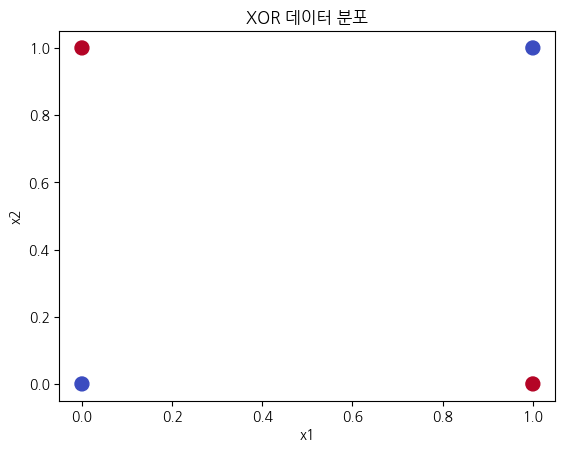

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

# XOR 데이터 정의
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])

# 데이터 시각화
plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', s=100)
plt.title("XOR 데이터 분포")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [19]:
from sklearn.neural_network import MLPClassifier

# 모델
model = MLPClassifier(
    hidden_layer_sizes=(4, ), # 히든레이어
    activation="tanh", # 비선형 활성화함수
    solver="adam", # 경사하강
    learning_rate_init= 0.1, # 학습률
    max_iter=1000, #최대 100번
    random_state= 42
)
# 훈련
model.fit(X,y)

# 예측
y_pred = model.predict(X)

# 결과 출력
print("예측 결과:", y_pred)
print("정확도:", model.score(X, y))


예측 결과: [0 1 1 0]
정확도: 1.0


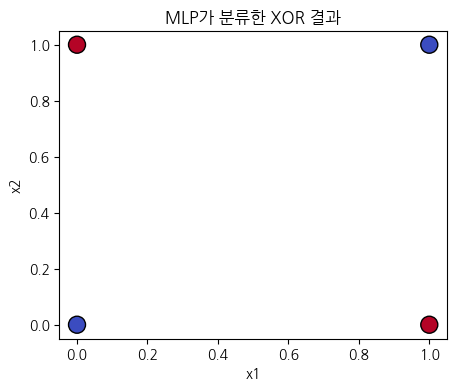

In [20]:
# 예측 결과 시각화
plt.figure(figsize=(5,4))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='coolwarm', s=150, edgecolor='k')
plt.title("MLP가 분류한 XOR 결과")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


In [21]:
# ===== 0. 라이브러리 =====
# 필요한 모듈 불러오기
import numpy as np
from sklearn.datasets import make_moons          # 2차원 반달형 데이터 생성
from sklearn.model_selection import train_test_split  # 학습/테스트 데이터 분할
from sklearn.preprocessing import StandardScaler      # 표준화(스케일링)
from sklearn.neural_network import MLPClassifier      # 다층 퍼셉트론(신경망 분류기)
from sklearn.pipeline import Pipeline                 # 전처리 + 모델 연결 파이프라인

# ===== 1. 데이터 준비 (샘플: 반달형 2클래스) =====
# make_moons: 반달 모양의 비선형 분류 데이터를 생성
# noise=0.25 → 약간의 랜덤 노이즈를 추가해 현실적인 분류 문제로 만듦
# random_state=42 → 결과 재현을 위해 난수 시드 고정
X, y = make_moons(n_samples=500, noise=0.25, random_state=42)

c:\Users\shlim\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127769 (\N{CRESCENT MOON}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


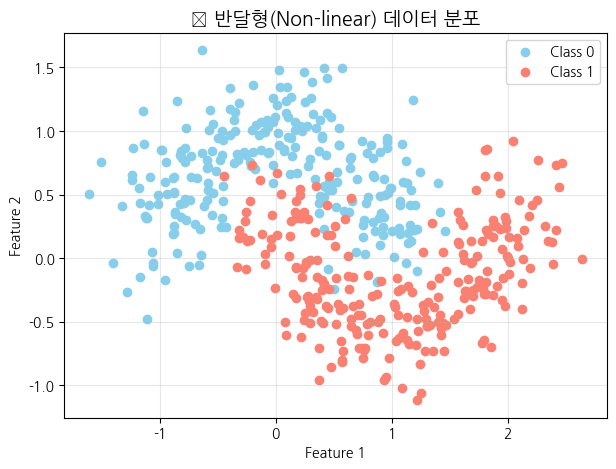

In [22]:
# 데이터 시각화
plt.figure(figsize=(7, 5))
plt.scatter(X[y==0, 0], X[y==0, 1], color='skyblue', label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], color='salmon', label='Class 1')
plt.title("🌙 반달형(Non-linear) 데이터 분포", fontsize=14)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

| 구분 | StandardScaler (표준화) | Normalization (정규화) |
|------|---------------------------|---------------------------|
| **변환 기준** | 평균(Mean)과 표준편차(Std) | 최소값(Min)과 최대값(Max) |
| **결과 범위** | 평균 0, 표준편차 1 | 0 ~ 1 (또는 -1 ~ 1) |
| **수식** | $(x - μ) / σ$ | $(x - min(x)) / (max(x) - min(x)$) |
| **대표 클래스** | `StandardScaler` | `MinMaxScaler` |
| **사용 목적** | 통계적 분석, 신경망, PCA | 거리 기반 알고리즘(KNN, K-means 등) |
| **예시 결과** | 평균=0, 분포 중심화 | 값이 0~1 사이로 압축 |


In [35]:
# 학습/테스트 데이터 분리
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 파이프라인 (표준화 -> mlp)
clf = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", (MLPClassifier(
        hidden_layer_sizes=(8,8), # 은닉층 8, 뉴런 8
        activation="relu",
        solver="adam",
        learning_rate_init=0.1,
        max_iter=1000,
        random_state=42
    )))
])

clf.fit(X_train, y_train)

,steps,"[('scaler', ...), ('mlp', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,hidden_layer_sizes,"(8, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001


In [36]:
# 평가 정확도
train_acc = clf.score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
print(train_acc,test_acc)


0.9625 0.94


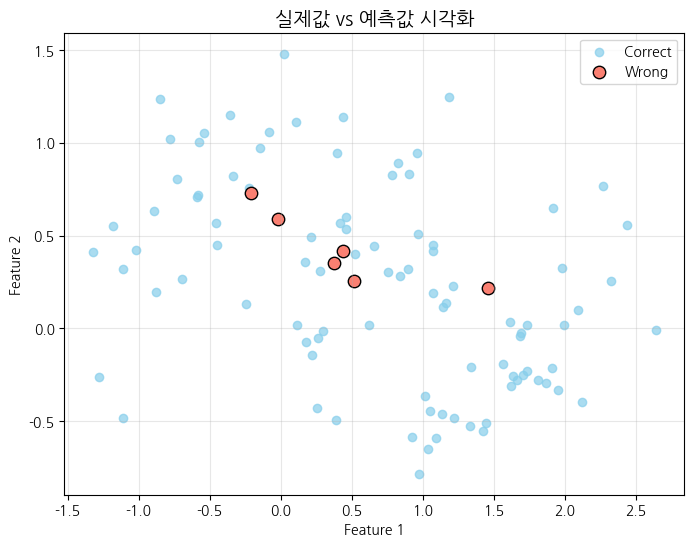

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# ===== 1. 예측값 계산 =====
y_pred = clf.predict(x_test)

# ===== 2. 예측 결과 비교 (정답 vs 오답 표시) =====
plt.figure(figsize=(8,6))
plt.title("실제값 vs 예측값 시각화", fontsize=14)

# 맞게 예측한 점 (파랑)
plt.scatter(
    x_test[y_pred == y_test, 0],
    x_test[y_pred == y_test, 1],
    color="skyblue",
    label="Correct",
    alpha=0.7
)

# 틀리게 예측한 점 (빨강)
plt.scatter(
    x_test[y_pred != y_test, 0],
    x_test[y_pred != y_test, 1],
    color="salmon",
    label="Wrong",
    edgecolor="black",
    s=80
)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(alpha=0.3)
plt.show()